# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- The code ran 20 trails and one test. The smartcab does not move at all during the simulation. It stays idle at an intersection (the agent state is not updated as a consequence). As a result, at the end of the trial, a message is displayed:

>*Trial Aborted!*

>*Agent did not reach the destination.*


-  The terminal shows a list of the different steps for each training trial. I have pasted below excerpts:


>*/-------------------*

>*| Step 117 Results*

>*\-------------------*


>*! Agent state not been updated!*

>*Agent idled at a green light with no oncoming traffic. (rewarded -4.76)*

>*Agent not enforced to meet deadline.*



>*/-------------------*

>*| Step 119 Results*

>*\-------------------*


>*!! Agent state not been updated!*

>*Agent properly idled at a red light. (rewarded 1.50)*

>*Agent not enforced to meet deadline.*



-  If the light is red, given that the smartcab is immobile, the code rewards the smartcab with a positive number (1.50 in the example above). 

-  But when the light is green, the reward is negative because the smartcab stays immobile instead of moving forward, or to the left or right.

-  It is interesting to note that the penalty for staying immobile at a green light is greater than the reward for staying immobile at a red light.

-  Each trial starts with the following comment because the learning flag in the file `agent.py` is set to False.

   >*Simulating trial. . .* 

   >*Agent not set to learn.*


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

The `agent.py` file has 12 flags.

   - learning: if set to True, the parameter *learning* enables the driving agent to use Q-learning.
   - enforce_deadline: if set to True, enforce_deadline enforces a deadline metric, i.e. the smartcab has to arrive at destination within a certain amount of time.
   - log_metrics: when set to True, the flag will record all trial and simulation results into the logs directory.
   
The function 'act(agent, action)' in the file `environment.py` file considers an action and performs that action if it is deemed legal. The function returns a reward for the agent based on traffic laws.
 
In the `simulator.py` file, the function 'render_text()' logs the simulated trial data in a csv file in the terminal/command prompt while the function 'render()' displays the results of the simulation on the GUI.
 
In the `planner.py` file, the 'next_waypoint()' function considers the East-West direction first.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


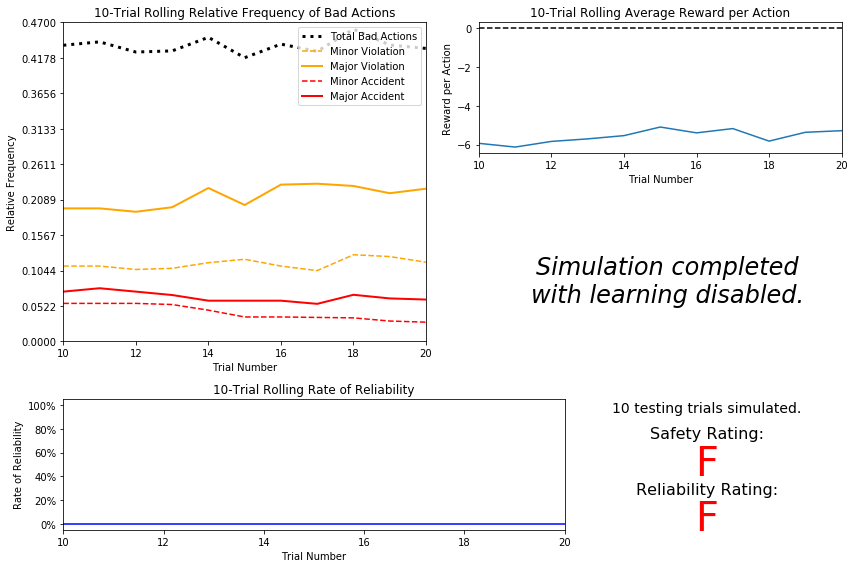

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- This basic driving agent makes bad decisions frequently: the percentage of bad actions oscillates around 41.5%. We can see from the first graph that the relative frequency of minor accident goes down (it is almost divided by 2 from 0.0525 to ~0.03),  the frequency of major accident decreases slighty. Accidents have a relative frequency of about 10%, which represent about 25% of all mistakes. The frequency of minor violation increases slighlty while the frequency for major violations (which represent about half of all mistakes) increases significantly. 


- The reliability rating is F, which makes sense given the number of accidents caused by the random driving nature of the smartcab. The rate of reliability stood at 0% for all trials, showing that the smartcab failed to learn from the trials (which is expected because we have not allowed the smartcab to learn from the trials.) 


- The agent receives positive rewards when it is doing the right thing (such as idling at a red light or following the waypoint forward). The agent receives penalties (i.e. negative rewards) when it is making a mistake (such as idling at a green light, provoking an accident, driving in the wrong direction...). The rolling average reward per action starts negative because of a penalty, decreased (from trial 10 to 11), increases (from trial 11 to 15). After trial 15 the rolling average reward oscillates (going up and down). The statements on the terminal show that the smartcab is heavily penalized for accidents. The heavy penalty leads to a decrease in the number of accidents. The increase in violations would suggest that the agent is not penalized enough for those violations, especially major ones.


- As the number of trials increase, the percentage of mistakes varies between ~41% and ~47%, the average rewards reach a plateau and the rate of reliability fails to increase. I would therefore conclude that the outcome of results does not change significantlty as the number of trials increases.


- A smartcab who commits violations or causes accidents more than 42% of the time can be deemed neither safe, nor reliability. The rate of reliability has been sateady at 0% for all the trials. The safety and reliability rating are both F. And the average reward per action was negative for all trials.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

* The 'waypoint' as well as the 4 types of 'inputs' ('light', 'left', 'right', and 'oncoming') are the most relevant features for learning safety. The 'light' parameter will indicate whether the cab should stay immobile and avoid an accident (in the case of a red light). If the 'light' turns green, but vehicles on the left, right and opposite the car are coming closer to the vehicle, the 'left', 'right', and 'oncoming' features will be useful to inform the cab about the movement of the other cars. 


* The only parameter that should be relevant for efficiency is the 'deadline' feature. A cab could safely reach the final destination after a deadline, which would lead to a drop in its efficiency.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

* 'Waypoint' can take 3 values (forward, left, and right).

* 'light' can take two values (red and green).

* 'left', and 'incoming' can take 4 values each (one of the 3 directions they can take and the value 'None'). I chose to take out the 'right' feature because the movements of the car on the right is irrelevant to the smartcab as long as no U-turn is allowed. If the car on the right turns to the right, left or goes straight and the green is red, the smartcab can always turn right (because it follows US traffic laws). If the light is green, then the smartcab can move on without regard to what the car on the right does (assuming the latter also follows US traffic laws).

* Deadline is the integer equal to 5 times the distance between the start point and the destination point. While it is relevant to measure the efficiency of smartcab, it should not be used to determine the route. The smartcab should always take the most fastest route regardless of the time left.

* Based on the comments above, we should only keep 'waypoint', 'light', 'left' and 'oncoming' to define the state.

* The total number of states will be equal to 3x2x4x4 = 96.

I think that the agent can learn a policy for each state after a number of trials at least equal to the nmber of state. Assuming that the smartcab might revisit some states (let's say 50% of them), we would need 96x1.5 = 144 states.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

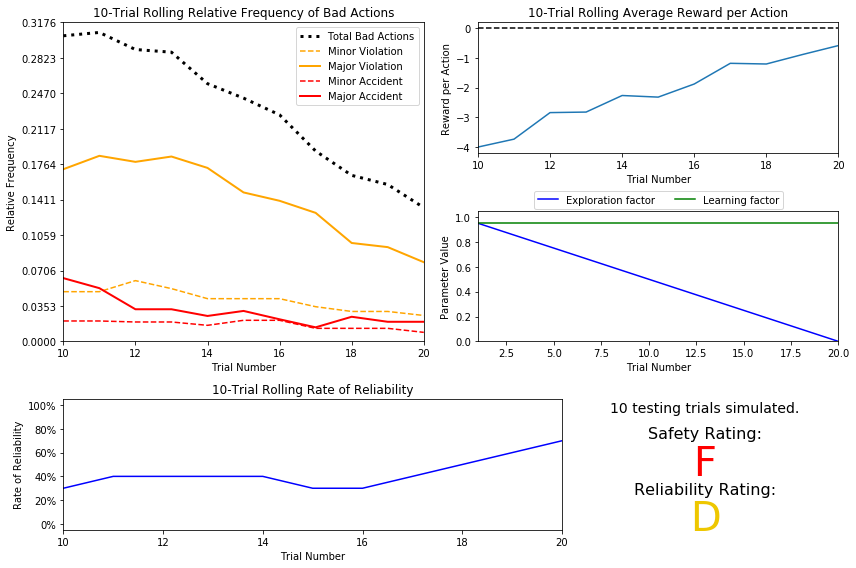

In [52]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** **TO DO**

* We can see striking differences in the reward, the frequency of bad actions and the rate of reliability. The reliability rating improves. We get a D instead of a F for the reliability rating. The safety rating still stands at F because the smartcab is still involved in accidents.


* The smartcab seems to learn better with Q-learning: the percentage of bad actions as well as the percentage of major accidents and the percentage of major violations significantly decrease with the number of trials (respectively from ~30% to ~14%, ~17% to ~9% and ~7% to ~4%). The minor violations decreases from ~4.5% to ~4%, and minor accidents from ~3% to ~1.5%.


* The reliability rate improves significantly and reaches ~80% instead of 0%. The increase in the reliability rate can be explained by the reduced number of bad actions, and accidents. 


* The rolling average reward per action increases from -4% to ~-0.5%. The smarcab's reward over time is increasing because the smartcab is learning and gets positive reward at each time step.


* 20 trials were required, which makes sense given the formula for the exploration rate epsilon. Epsilon starts at 1 and decreases by 0.05 at each step. After 1/0.05 = 20 steps, the exploration factor epsilon is zero. We can see the downward slowing line in the parameters graph (the learning rate stays constant at 0.5).

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

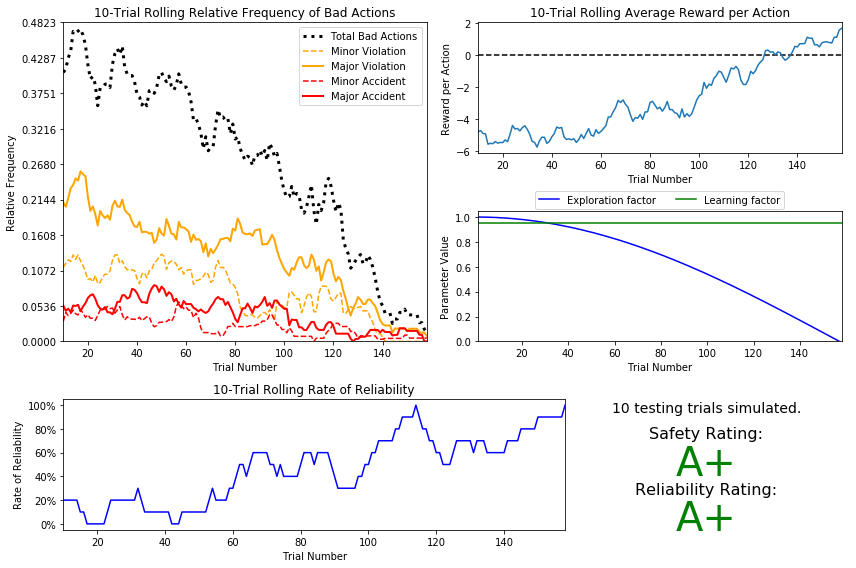

In [55]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

* I tested many decaying functions (1/t^2, cost(0.01t), and 0.95^t) where t is the trial number. I found that the cost(0.01t) and the 0.95^t functions both led to safety and reliability rating equal to A+. The example above is the result of the training with the cos(0.01t) function. 


* I think that the 1/t^2 function was decaying too fast and leading to small values of epsilon. When epsilon is small, the probability of choosing a random action decreases, which means that the smartcab is not exploring enough states. I also think that the most promising functions for epsilon are convex functions: the 1/t^2 function is concave and will decrease too sharply for the learning agent to explore all states. Because the goal is to have an optimal policy that pairs each state with an action, allowing the learning agent to explore all the states is essential.


* I used an epsilon-tolerance equal to 0.0005 and alpha equal to 0.95. The agent will continue learning until epsilon is less than epsilon-tolerance. The lower epsilon-tolerance, the longer the agent will learn. A higher alpha puts more weight on the reward in the Q formula. The higher alpha the more the agent learns.
we can see that the frequency of bad actions (including major accidents) plummets to zero at the end of the training, which shows that teh parameters were properly tuned for the agent to maximize its learning.


* How did I choose the function's parameter a in the function (cos(a x t))? I discovered that the smartcab could be properly trained after 140 trials. The decaying function needs to be decreasing from 0 to 140, which means that:
    > 140 x a = pi / 2 where pi is about 3.14
    
    > The equation above yields a value a equal to a = pi / (2x140) = ~0.01

* About 160 trials were needed before the agent began testing.


* This Q-learner is much more performant than the default Q-learner: the only change was the epsilon decay function as well as the epsilon-tolerance. The ratings for safety and reliability increased from F/D to A+/A+. The reward per action almost reaches 2 at the end of the training, the frequency of bad actions plummets to zero and the rate of reliability reaches 100%.


* As a result, I would say that the driving agent successfully learned an appropriate policy.


* I am satisfied with the maximum safety and reliability ratings (A+/A+).


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**

**Optimal Policy:**

The smartcab is following US right-of-way traffic law. The optimal policy should only allow right turns when the light is red. The car would either stay put ('None') if there is a car on the left or an oncoming car wanting to respectively drive forward and turn left. If the light is green, the car should be allowed to go in any three directions.

** Analysis of specific policies **

I have randomly chosen three policies. The state is the following tuple ('waypoint', 'light', 'left', 'oncoming'):

Example 1 (optimal policy)
> ('forward', 'green', 'forward', 'forward')

 > -- forward : 2.18
 
 > -- None : 0.00
 
 > -- right : 0.00
 
 > -- left : -19.15
 
This is what I expected: if the driving agent should be going forward, the light is green, and the left and oncoming cars are driving forward, then the optimal action is to drive forward (the left car will stay idle because there should be a red light). If the driving agent were to turn left, it could cause an accident, hence the severe penalty (-19.15).
 
Example 2 (optimal policy)
> ('forward', 'green', 'left', 'forward')

 > -- forward : 1.12
 
 > -- None : -4.34
 
 > -- right : 0.00
 
 > -- left : 0.00
 
This is also what I expected: the car should drive forward. The light is green. The car on the left intends to turn left while the oncoming car intends to go forward. The driving agent can safely drive forward. It is rewarded for that action with a reward equal to 1.12. The smartcab will be penalized if it stays idle.  

Example 3 (sub-optimal policy)
> ('forward', 'green', 'right', 'left')

 > -- forward : 0.00

 > -- None : -4.22
 
 > -- right : 1.04
 
 > -- left : 0.32

This policy is sub-optimal. The smartcab intends to go forward. The light is green. Because the oncoming car intend to turn left, it cannot move forward (and gets zero rewards) but the policy would make the car to turn right (because the right action has the highest Q value). While the smartcab will be safe in such a maneuver, it will not be efficient.



Example 4 (sub-optimal policy): 
> ('right', 'red', 'right', 'left')

 > -- forward : 0.00
 
 > -- None : 0.00
 
 > -- right : 2.46
 
 > -- left : 0.00
 
In this example, the smartcab intends to drive right, the light is red for the smartcab. The left car intends to turn right, which would not impact the smartcab. The oncoming intends to drive left, which could cause an accident. I am surprised that the safety rating was A+ given that sub-optimal policy. 

I think that the Q-learner had not had a chance to explore the last two policies and optimize them.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

**Environment:**

The smartcab cannot predict the future decisions of the other cars. The decisions of each car depend on the decisions of all cars (including cars away from the intersection where the smart car is). If the smartcab had knowledge of the other cars' locations and density, it could extrapolate future movements in a not-so-distant future and incorporate these future movements and locations in its decision making. Said differently, a change in the environment (the numbers of cars, the differing speed of cars) could dramatically change the optimal decision at each time step.

**Smartcab:**

The state space contains the most basic information ('waypoint', 'light', 'left', and 'oncoming'). These features are valid at each time step. If the state incorporated features related to future actions such as next_waypoint (the next intended waypoint after the intersection), then the smartcab could make appropriate decisions that take into account future intentions.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.